<a href="https://colab.research.google.com/github/jagvgithub/Python_para_IA/blob/main/JAGV_01MAIR_ACT_Video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidad Internacional de Valencia
## Python para la inteligencia artificial
### Jose Antonio Gómez Vargas


## 01MIAR - Actividad Video Valencia Pollution

## NumPy y Pandas

### Objetivos:
- Aplicar diferentes técnicas de tratamiento de estructuras numéricas con Numpy y datos estructurados con Pandas.


#### Descripción
El conjunto de datos "valencia_pollution_dataset.csv" (fichero disponible adjunto a la actividad) proviene de una descarga de datos del servicio web del ayuntamiento de la ciudad de Valencia de datos abiertos.

Los datos recabados de este servicio web son de mediciones cada hora de una serie de estaciones de contaminación atmosférica.

https://valencia.opendatasoft.com/explore/dataset/estacions-contaminacio-atmosferiques-estaciones-contaminacion-atmosfericas/information/

Cada estación realiza una serie de mediciones acerca de la calidad del aire, y de ciertas sustancias que se consideran importantes para analizar la contaminación atmosférica en la ciudad.

#### Columnas para trabajar:
- objectid: id de la estación
- nombre: nombre de la estación
- dirección: dirección de la estación
- tipozona: tipo de la zona, urbana o sub urbana
- tipoemision: tráfico o fondo
- so2: niveles de dióxido de azufre
- no2: niveles de dióxido de nitrogeno
- o3: niveles de ozono
- co: niveles de monóxido de carbono
- pm10: niveles de partículas en suspensión hasta 10um
- pm25: niveles de partículas en suspensión hasta 2,5um
- fecha_carga: timestamp de la actualización de los datos
- calidad_ambiental: estimación de la calidad del aire

---
# importe de paquetes y librerías utilizados dentro del script

---

In [1]:
import pandas as pd  # Para manipulación de datos tabulares
import numpy as np   # Para operaciones numéricas eficientes
from datetime import datetime  # Para trabajar con fechas y horas
import warnings  # Para manejar advertencias
import plotly.express as px  # Para gráficos interactivos y de alta calidad
import seaborn as sns  # Para gráficos estadísticos atractivos
import matplotlib.pyplot as plt  # Para trazado básico y personalizado
warnings.filterwarnings("ignore")  # Ignorar advertencias



**Carga de datos de csv (valencia_pollution_dataset.csv) en un DataFrame**

In [2]:
import pandas as pd

# URL del archivo en GitHub
url = "https://github.com/jagvgithub/Python_para_IA/blob/main/valencia_pollution_dataset.csv?raw=true"

# Leer el archivo CSV en un DataFrame de pandas
datos = pd.read_csv(url)

# Mostrar las primeras filas del DataFrame
print("Cabecera de la fuante de información \n")
display(datos.head())

# limpieza de datos

datos['objectid']=datos['objectid'].astype('int64').astype(str).str.strip().str.lstrip().str.rstrip()

print(f"\n la fuente de información consta de un total  de: {len(datos)} registros ")

Cabecera de la fuante de información 



,objectid,nombre,direccion,tipozona,tipoemision,so2,no2,o3,co,pm10,pm25,fecha_carga,calidad_ambiental
0,26,Pista de Silla,"C/ Filipinas, s/n",Urbana,Tráfico,0.0,10,71.0,0.7,8.0,3.0,2024-05-24T20:20:06+00:00,Razonablemente Buena
1,28,Viveros,Jardines de Viveros,Urbana,Fondo,0.0,5,88.0,NaN,NaN,NaN,2024-05-24T20:20:08+00:00,Razonablemente Buena
2,431,Olivereta,Av. del Cid amb Av. de les Tres Creus,Urbana,Tráfico,NaN,24,NaN,NaN,20.0,11.0,2024-05-24T20:20:11+00:00,Razonablemente Buena
3,432,Patraix,"Archiduque Carlos, 84ac",Urbana,Tráfico,NaN,15,NaN,NaN,20.0,11.0,2024-05-24T20:20:12+00:00,Razonablemente Buena
4,23,Francia,"Avda. de Francia, 60",Urbana,Tráfico,1.0,3,82.0,0.1,9.0,6.0,2024-05-24T20:20:04+00:00,Razonablemente Buena



 la fuente de información consta de un total  de: 396 registros 


---
Revisión de formato de los campos de los datos a trabajar

---

In [3]:
# información adicional del conjunto de datos
display(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   objectid           396 non-null    object 
 1   nombre             396 non-null    object 
 2   direccion          396 non-null    object 
 3   tipozona           396 non-null    object 
 4   tipoemision        396 non-null    object 
 5   so2                216 non-null    float64
 6   no2                396 non-null    int64  
 7   o3                 216 non-null    float64
 8   co                 108 non-null    float64
 9   pm10               288 non-null    float64
 10  pm25               288 non-null    float64
 11  fecha_carga        396 non-null    object 
 12  calidad_ambiental  396 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 40.3+ KB


None

---
Análisis exploratorio de datos

---

In [4]:
display(datos.describe(include='all'))

,objectid,nombre,direccion,tipozona,tipoemision,so2,no2,o3,co,pm10,pm25,fecha_carga,calidad_ambiental
count,396,396,396,396,396,216.000000,396.000000,216.0000,108.000000,288.000000,288.000000,396,396
unique,11,11,11,2,2,NaN,NaN,NaN,NaN,NaN,NaN,315,2
top,26,Pista de Silla,"C/ Filipinas, s/n",Urbana,Tráfico,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-25T16:20:13+00:00,Razonablemente Buena
freq,36,36,36,324,288,NaN,NaN,NaN,NaN,NaN,NaN,2,296
mean,NaN,NaN,NaN,NaN,NaN,1.449074,8.921717,71.0000,0.366667,14.687500,8.031250,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.400066,6.453058,13.0662,0.250607,6.258061,3.224859,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,36.0000,0.100000,6.000000,2.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,0.000000,4.000000,63.0000,0.100000,7.000000,5.750000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.000000,7.000000,75.0000,0.300000,16.500000,8.500000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,2.000000,12.000000,81.0000,0.700000,19.000000,10.000000,NaN,NaN


---
# Preguntas de la actividad

---


---
a) ¿Cuál es el rango temporal del dataset?

b) Obtención del número de estaciones que tienen un sensor para medir monóxido de carbono

---

In [5]:
''' para dar solución al literal a es necesario definir el campo fecha_carga como datetime '''

# .split('+')[0] : Eliminar desde el signo + en adelante

# .replace('T', ' ') : Eliminar el caracter 'T'

# .strptime(fecha_hora_str, '%Y-%m-%d %H:%M:%S') : Convertir la cadena a objeto datetime

datos['fecha_carga'] = datos['fecha_carga'].str.split('+').str[0].str.replace('T', ' ')

datos['fecha_carga'] = pd.to_datetime(datos['fecha_carga'], format='%Y-%m-%d %H:%M:%S')

li_fecha,ls_fecha = datos['fecha_carga'].min(),datos['fecha_carga'].max()

print(f"\n El rango de fechas contemplado en el cojunto de datos va desde {li_fecha} hasta {ls_fecha} \n es decir, {(ls_fecha - li_fecha).days} día o {round((ls_fecha - li_fecha).total_seconds() / 3600,2)} horas. ")



 El rango de fechas contemplado en el cojunto de datos va desde 2024-05-24 20:20:04 hasta 2024-05-26 10:20:13 
 es decir, 1 día o 38.0 horas. 


In [6]:
'''Solución al solución al literal b '''
print(f"El número de estaciones que tienen un sensor para medir monóxido de carbono es : {datos[datos['co'] > 0]['objectid'].nunique()}")

El número de estaciones que tienen un sensor para medir monóxido de carbono es : 3



---
Número de estación con la media más alta de mediciones de monóxido de carbono

---

In [7]:
# Eliminar filas con valores nulos en la columna 'co'
datos_sin_nulos = datos.dropna(subset=['co'])

# Calcular la media de ingreso para cada objectid
ingreso_por_objectid = datos_sin_nulos.groupby('objectid')['co'].mean().reset_index()

# Crear el gráfico de barras
fig = px.bar(ingreso_por_objectid, x='objectid', y='co', title='Media de mediciones de monóxido de carbono objectid')

# Ajustes estéticos
fig.update_layout(xaxis_title='Objectid', yaxis_title='Media de monóxido de carbono', xaxis_tickangle=-45)

# Mostrar el gráfico
fig.show()

max_media_co = ingreso_por_objectid['co'].max()
estacion_max_media = ingreso_por_objectid.loc[ingreso_por_objectid['co'] == max_media_co, 'objectid'].iloc[0]

print(f'\n El número de estación con la media más alta de mediciones de monóxido de carbono fue: {estacion_max_media}')



 El número de estación con la media más alta de mediciones de monóxido de carbono fue: 26


---
Realizar el histograma de dióxido de nitrógeno de la estación del punto anterior

---

In [8]:
valores_histograma = list(datos[datos['objectid']== str(estacion_max_media)]['no2'])

# Convertir la lista de datos en un DataFrame de pandas
df = pd.DataFrame(valores_histograma, columns=['valor'])

# Crear el histograma con Plotly
fig = px.histogram(df, x='valor', nbins=df['valor'].nunique(), title=f'histograma de dióxido de nitrógeno de la estación {estacion_max_media}')
fig.update_xaxes(title='Estación')
fig.update_yaxes(title='Frecuencia')

# Mostrar el histograma
fig.show()


---
Realizar gráfica con  la línea temporal de las mediciones de ozono de la estación del punto anterior. Pista, la columna 'fecha_carga' habría que cambiarla de tipo.

---

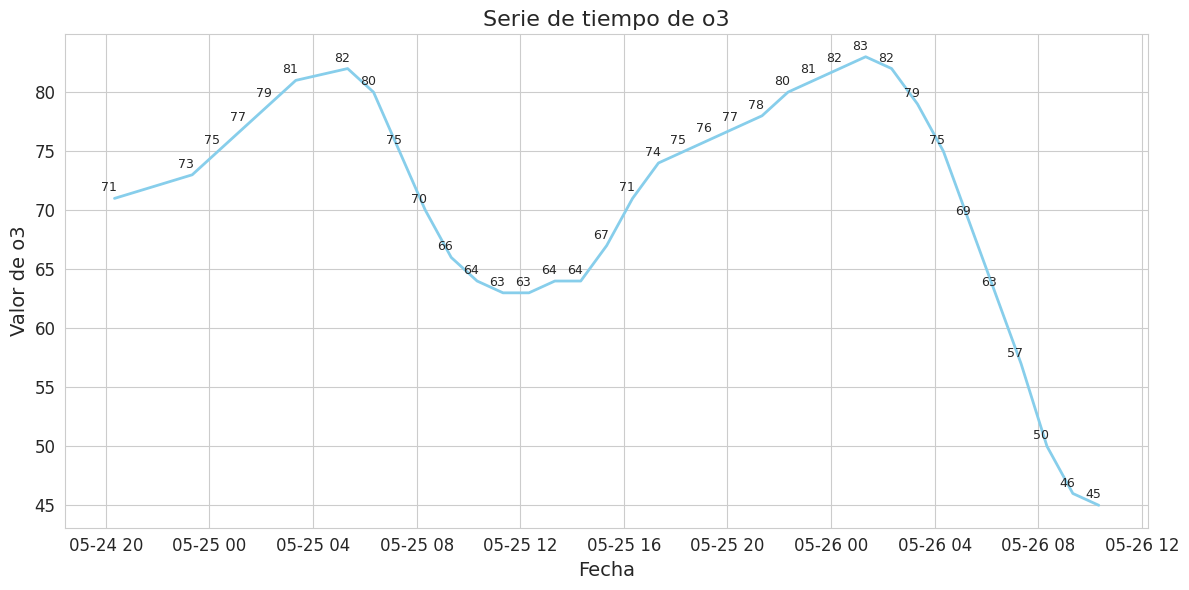

In [9]:
filtro = valores_histograma = datos[datos['objectid'] == str(estacion_max_media)][['fecha_carga', 'o3']]

# Convertir la columna de fecha_carga a tipo datetime si aún no está en ese formato
filtro['fecha_carga'] = pd.to_datetime(filtro['fecha_carga'])

# Establecer la columna de fecha_carga como el índice del DataFrame
filtro.set_index('fecha_carga', inplace=True)

# Configurar el estilo de seaborn
sns.set_style("whitegrid")

# Graficar la serie de tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtro, x=filtro.index, y='o3', color='skyblue', linewidth=2, markers='o', markerfacecolor='blue', markeredgewidth=0)

# Anotar los valores en cada punto
for index, row in filtro.iterrows():
    plt.annotate(f'{int(row["o3"])}', xy=(index, row["o3"]), xytext=(-10, 5), textcoords='offset points', fontsize=9)

plt.title('Serie de tiempo de o3', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Valor de o3', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


---
Cierre del ejercicio

---